In [1]:
import os
import tensorflow as tf

In [2]:
IS_LOCAL = True

if  IS_LOCAL:
    # Checkpoint directory and paths
    CHECKPOINT_DIR = os.path.join("data", "models", "mlp_text")

In [5]:
# load model
new_model = tf.keras.models.load_model(os.path.join(CHECKPOINT_DIR, 'mlp_model_v2.h5'))
print(new_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               10909568  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 27)                3483      
                                                                 
Total params: 10,913,051
Trainable params: 10,913,051
Non-trainable params: 0
_________________________________________________________________
None


['dense_6', 'dropout_4', 'dense_7', 'dropout_5', 'dense_8']
(None, 256)
(None, 27)
Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_47 (InputLayer)          [(None, 85230)]      0           []                               
                                                                                                  
 input_48 (InputLayer)          [(None, 85230)]      0           []                               
                                                                                                  
 dense_6_m1 (Dense)             (None, 128)          10909568    ['input_47[0][0]']               
                                                                                                  
 dense_6_m2 (Dense)             (None, 128)          10909568    ['input_48[0][0]']               
        

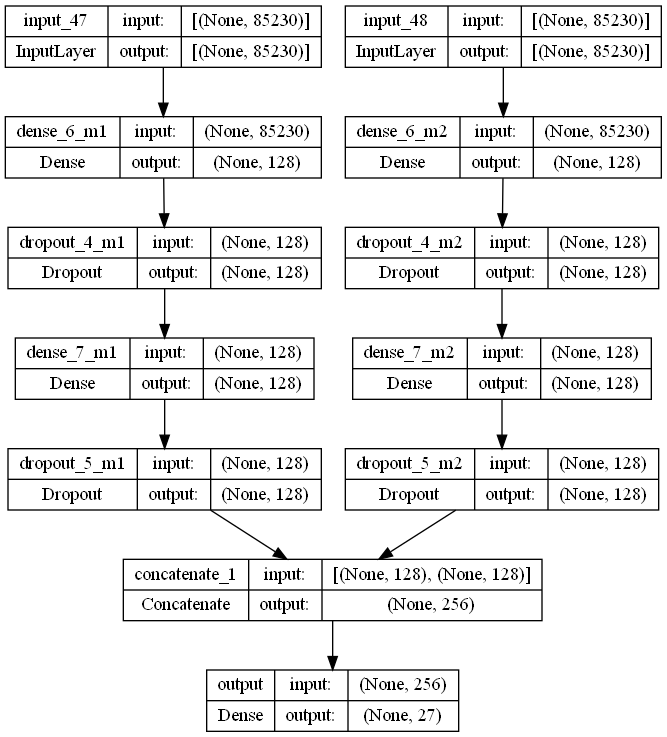

In [36]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()
from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense, Concatenate

%matplotlib inline
def _get_last_layer_units_and_activation(num_classes):
    """Gets the # units and activation function for the last network layer.

    # Arguments
        num_classes: int, number of classes.

    # Returns
        units, activation values.
    """
    if num_classes == 2:
        activation = 'sigmoid'
        units = 1
    else:
        activation = 'softmax'
        units = num_classes
    return units, activation

new_model1 = tf.keras.models.load_model('mlp_model_v2.h5')

#print("new_model")
#print(new_model.summary())
first_inputs = tf.keras.Input(shape=(85230,))
print([x.name for x in new_model1.layers])

nb_layers = len(new_model1.layers)
x = first_inputs

for i, layer in enumerate(new_model1.layers):
    if (i==nb_layers-1):
        continue
    layer._name =  layer._name+"_m1"
    x = new_model1.get_layer(layer.name)(x)
x1 = x

new_model2 = tf.keras.models.load_model('mlp_model_v2.h5')
second_inputs = tf.keras.Input(shape=(85230,))
nb_layers = len(new_model2.layers)
x = second_inputs

for i, layer in enumerate(new_model2.layers):
    if (i==nb_layers-1):
        continue
    layer._name =  layer._name+"_m2"
    x = new_model2.get_layer(layer.name)(x)    
x2 = x

#x_conc = Concatenate(axis=-1)([x1, x2])
x_conc = tf.keras.layers.concatenate([x1, x2])
print(x_conc.shape)
op_units, op_activation = _get_last_layer_units_and_activation(27)
output = tf.keras.layers.Dense(units=op_units, activation=op_activation, name='output')(x_conc)
print(output.shape)
end_model = tf.keras.Model(inputs=[first_inputs, second_inputs], outputs=[output])
print(end_model.summary())

tf.keras.utils.plot_model(end_model, "multi_input_and_output_model.png", show_shapes=True)